In [198]:
#Task 3 Edge Detector
from scipy import misc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import matplotlib.image as mpimg
import random as rnd
import matplotlib.mlab as mlab
from skimage import io, color
import math


%matplotlib inline
    

img = mpimg.imread('./HW1/Images/Q1/cameraman.jpg')

/Users/jeffponnor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/jeffponnor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in ubyte_scalars


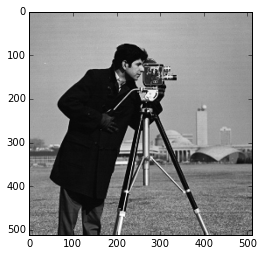

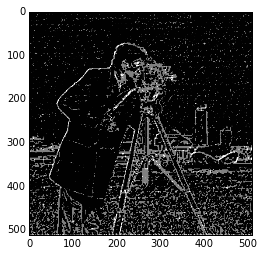

In [207]:
w,h,d = tuple(img.shape)
img2 = np.zeros((w,h,d))

#Main loop for edge detection
for i in range(1,h):
    for j in range(1,w):
        
        #Check differences along x and y axis
        x_range = abs(img[i][j][0]-img[i][j-1][0]) 
        y_range = abs(img[i][j][0]-img[i-1][j][0]) 
        
        #If horizontal difference is beyond threshold detect edge
        if x_range < 20: 
            x_range = 255
        else: 
            x_range = 1
        
        #If vertical difference is beyond threshold detect edge
        if y_range < 10:
            y_range = 255
        else:
            y_range = 1
        
        #Combine Edge results
        result = (x_range + y_range)/2
        
        img2[i][j][0] = result
        img2[i][j][1] = result
        img2[i][j][2] = result
        


#Denoises by checking that the min value is at least within range
for i in range(1,h-2):
    for j in range(1,w-2):
        pixelList = []
        for i2 in range(3):
            for j2 in range(3):
                pixelList.append(img2[i+i2][j+j2][0])
        
        value = max(pixelList)
        
        img2[i][j][0] = value 
        img2[i][j][1] = value
        img2[i][j][2] = value

#Applies threshold
threshold = 100
for i in range(1,h-1):
    for j in range(1,w-1):
        value = img2[i][j][0]
        if abs(value)>threshold: 
            value = 255
        else: 
            value = 1
        
        img2[i][j][0] 
        
plt.figure(1)
plt.imshow(img)
plt.figure(2)
plt.imshow(img2)

